### Wavelet characteristics

In [14]:
import os
import pywt
import numpy as np
import matplotlib.pyplot as plt
from marine_acoustics.configuration import settings as s

# Change cwd
os.chdir(r'C:\Users\james\OneDrive - Nexus365\Engineering\Year4\4YP\git\marine_acoustics')

# Figures appear in notebook inline
%matplotlib inline

-0.5 0.5
Complex Morlet wavelet : cmor1-1
------------------------------
Center frequency: 1.0
Bandwidth frequency: 1.0

256


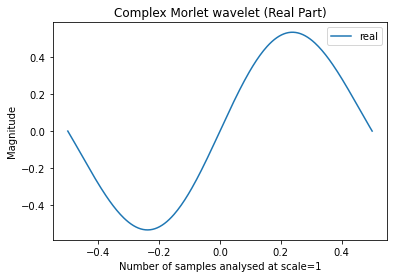

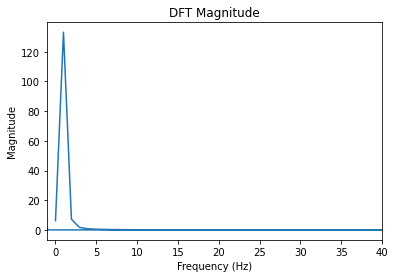

In [288]:
def plot_wavelet(wavelet):   
    """Plot wavelet"""

    [psi, x] = wavelet.wavefun(level=8)

    plt.figure()
    plt.plot(x, np.imag(psi), label='real')
    #plt.plot(x, np.imag(psi), label='imag')
    plt.title(f'{wavelet.family_name[:-1]} (Real Part)')
    plt.xlabel('Number of samples analysed at scale=1')
    plt.ylabel('Magnitude')
    plt.legend()

    return [psi, x]

def plot_dft(psi, title='DFT Magnitude', xlabel='Frequency (Hz)', ylabel='Magnitude'):
    """Plot DFT magnitude for a real 1D array"""

    # Calculate DFT
    dft = np.fft.fft(psi)
    dft = np.abs(dft)
    

    # Calculate DFT frequency bins
    dft_freqs = np.fft.fftfreq(psi.size, d=1/s.SR)

    # Plot
    plt.figure()
    plt.plot(dft_freqs, dft)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim([-1,40])

wavelet_str = 'shan0.01-0.65'
wavelet_str = 'cmor1-1'


wavelet = pywt.ContinuousWavelet(wavelet_str)
wavelet.lower_bound = -0.5
wavelet.upper_bound = 0.5

fc = wavelet.center_frequency * 1
bw = wavelet.bandwidth_frequency * 1
name = wavelet.family_name[:-1]

print(wavelet.lower_bound, wavelet.upper_bound)
print(f'{name} : {wavelet_str}\n' + '-'*30 + f'\nCenter frequency: {fc}\n'
      f'Bandwidth frequency: {bw}\n')

# Plot wavelet
psi, x = plot_wavelet(wavelet)
print(len(x))
plot_dft(psi)